# Association Rule

**Association rule mining** is a technique to identify underlying relations between different items.

Usually, there is a pattern in what the customers buy. 

**Market Basket analysis**

More profit can be generated if the relationship between the items purchased in different transactions can be identified.

The process of identifying an associations between products is called association rule mining.

## Theory of Apriori Algorithm

Apriori 演算法是「關聯規則學習」或是「關聯分析（Associative Analysis）」的經典演算法之一

目的是在一個資料集當中，找出不同項與項之間可能存在的關係

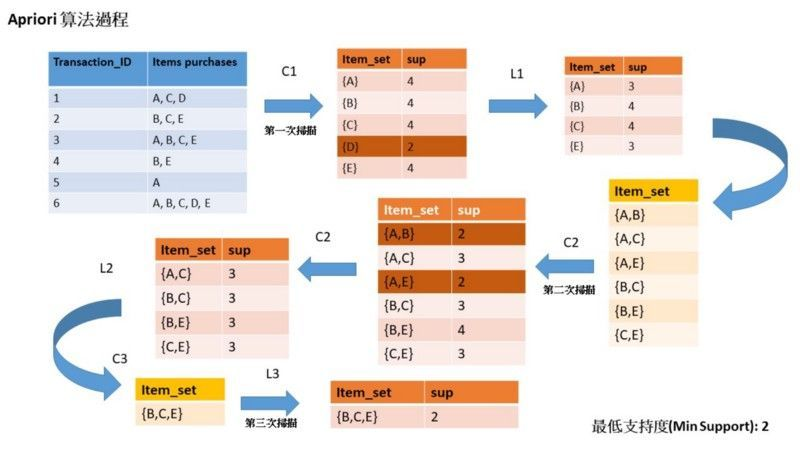

There are three major components of Apriori algorithm:
- 支持度（Support）
- 信賴度（Confidence）
- 提昇度（Lift）

### 支持度（Support）

Support refers to the default popularity of an item and can be calculated by finding number of transactions containing a particular item divided by total number of transactions.

這個商品組合在所有購買清單中，出現的機率

Support(X) = (Transactions containing (X)) / (Total Transactions)

It is the probability of an event to occur.

For instance if out of 1000 transactions, 100 transactions contain X then the support for item X can be calculated as:

Support(X) = (Transactions containing X) / (Total Transactions)

Support(X) = 100 / 1000 = 10%

### 信賴度（Confidence）

Confidence refers to the likelihood that an item B is also bought if item A is bought. It can be calculated by finding the number of transactions where A and B are bought together, divided by total number of transactions where A is bought.

購買A商品後，購買B商品的機率

Confidence(A→B) = (Transactions containing both (A and B)) / (Transactions containing A)

It is a measure of conditional probability

For instance if we had 50 transactions where A and B were bought together. While in 150 transactions, A are bought. Then we can find likelihood of buying B when a A is bought can be represented as confidence of A -> B and can be mathematically written as:

Confidence(A→B) = 50 / 150 = 33.3%

### 提昇度（Lift）

Lift(A -> B) refers to the increase in the ratio of sale of B when A is sold. A Lift of 1 means there is no association between products A and B. Lift of greater than 1 means products A and B are more likely to be bought together. Finally, Lift of less than 1 refers to the case where two products are unlikely to be bought together.

判斷A商品與B商品的相關程度，若小於1表示負相關，等於1表示完全無相關（完全沒有交集），大於1表示正相關

Lift(A –> B) can be calculated by dividing Confidence(A -> B) divided by Support(B). Mathematically it can be represented as:

Lift(A→B) = (Confidence (A→B)) / (Support (B))


It is the probability of all items occurring together divided by the product of antecedent and consequent occurring as if they are independent of each other.

For instance the Lift(A -> B) can be calculated as:

Lift(Burger→Ketchup) = 33.3 / 10 = 3.33

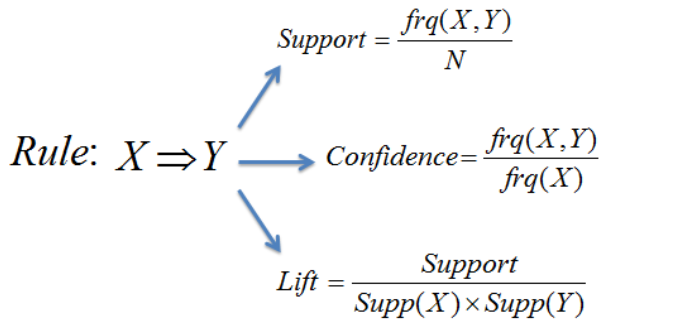

For large sets of data, there can be hundreds of items in hundreds of thousands transactions. The Apriori algorithm tries to extract rules for each possible combination of items. But this process can be extremely slow due to the number of combinations. 

To speed up the process, we need to perform the following steps:

- Set a minimum value for support and confidence. This means that we are only interested in finding rules for the items that have certain default existence (e.g. support) and have a minimum value for co-occurrence with other items (e.g. confidence).

- Extract all the subsets having higher value of support than minimum threshold.

- Select all the rules from the subsets with confidence value higher than minimum threshold.

- Order the rules by descending order of Lift.

本次會使用到的套件:

- Numpy - Matrices and Mathematical Functions
- Pandas - Data Manipulation and Analysis
- Matplotlib - Simple Visualization
- mlxtend - It is a Python library of useful tools for the day-to-day data science tasks
- apyori - It is a simple implementation of Apriori algorithm, provided as APIs and as commandline interfaces

mlxtend

http://rasbt.github.io/mlxtend/

apyori

https://github.com/ymoch/apyori

In [1]:
! pip install mlxtend

In [2]:
! pip install apyori

# mlxtend

In [3]:
import pandas as pd
import numpy as np

In [4]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]
print(dataset)

[['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], ['Milk', 'Apple', 'Kidney Beans', 'Eggs'], ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'], ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]


## Frequent Itemsets

由於 apriori function 要求 data 使用 pandas DataFrame格式，如果 raw data 是其他格式，則需要用 Transaction Encoder 的 fit 和 transform 轉檔

Transaction Encoder 可以從dataset中 learns unique items，並將每一個 transaction ( Python 的 List ) 轉變成one-hot encoded boolean Numpy array

In [5]:
from mlxtend.preprocessing import TransactionEncoder

In [6]:
te = TransactionEncoder()
te_tf = te.fit(dataset).transform(dataset)
te_tf

array([[False, False, False,  True, False,  True,  True,  True,  True,
        False,  True],
       [False, False,  True,  True, False,  True, False,  True,  True,
        False,  True],
       [ True, False, False,  True, False,  True,  True, False, False,
        False, False],
       [False,  True, False, False, False,  True,  True, False, False,
         True,  True],
       [False,  True, False,  True,  True,  True, False, False,  True,
        False, False]])

In [7]:
te.columns_

['Apple',
 'Corn',
 'Dill',
 'Eggs',
 'Ice cream',
 'Kidney Beans',
 'Milk',
 'Nutmeg',
 'Onion',
 'Unicorn',
 'Yogurt']

In [8]:
df = pd.DataFrame(te_tf , columns = te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [9]:
dfv = df.copy()
print(dfv)

   Apple   Corn   Dill   Eggs  Ice cream  Kidney Beans   Milk  Nutmeg  Onion  \
0  False  False  False   True      False          True   True    True   True   
1  False  False   True   True      False          True  False    True   True   
2   True  False  False   True      False          True   True   False  False   
3  False   True  False  False      False          True   True   False  False   
4  False   True  False   True       True          True  False   False   True   

   Unicorn  Yogurt  
0    False    True  
1    False    True  
2    False   False  
3     True    True  
4    False   False  


In [10]:
te.inverse_transform(te_tf)

[['Eggs', 'Kidney Beans', 'Milk', 'Nutmeg', 'Onion', 'Yogurt'],
 ['Dill', 'Eggs', 'Kidney Beans', 'Nutmeg', 'Onion', 'Yogurt'],
 ['Apple', 'Eggs', 'Kidney Beans', 'Milk'],
 ['Corn', 'Kidney Beans', 'Milk', 'Unicorn', 'Yogurt'],
 ['Corn', 'Eggs', 'Ice cream', 'Kidney Beans', 'Onion']]

# Aprioi

Get frequent itemsets from a one-hot DataFrame

apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)

重要參數:
- df : 編碼後的dataframe
- min_suppoet : 給定的最小支持度
- use_colnames : 預設False，則返回的物品組會用編號顯示，為True的話直接顯示物品名稱
- max_len : 最大物品組合數，預設是None，不做限制

http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/

In [11]:
from mlxtend.frequent_patterns import apriori

In [12]:
apriori(df, min_support = 0.6)

,support,itemsets
0,0.8,(3)
1,1.0,(5)
2,0.6,(6)
3,0.6,(8)
4,0.6,(10)
5,0.8,"(3, 5)"
6,0.6,"(8, 3)"
7,0.6,"(5, 6)"
8,0.6,"(8, 5)"
9,0.6,"(10, 5)"


In [13]:
freq_item = apriori(df, min_support = 0.6, use_colnames = True)
freq_item

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


In [14]:
freq_item['length'] = freq_item['itemsets'].apply(lambda x :len(x))
freq_item

,support,itemsets,length
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Eggs, Kidney Beans)",2
6,0.6,"(Eggs, Onion)",2
7,0.6,"(Milk, Kidney Beans)",2
8,0.6,"(Onion, Kidney Beans)",2
9,0.6,"(Yogurt, Kidney Beans)",2


In [15]:
freq_item[freq_item['itemsets'] == {'Onion', 'Eggs'}]

,support,itemsets,length
6,0.6,"(Eggs, Onion)",2


# Association rules

association_rules(df, metric='confidence', min_threshold=0.8, support_only=False)

重要參數:
- df : pandas DataFrame
- metric : string (default: 'confidence')
- min_threshold : float (default: 0.8)
- support_only : bool (default: False)

http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/

In [16]:
from mlxtend.frequent_patterns import association_rules

In [17]:
rules = association_rules(freq_item, metric= 'confidence', min_threshold = 0.7)
rules = association_rules(freq_item, metric= 'lift', min_threshold = 1.2)

In [18]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Support vs Confidence')

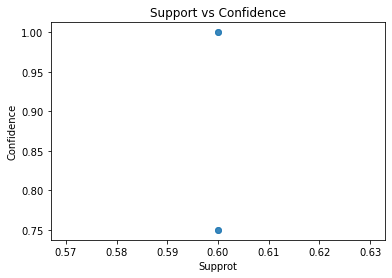

In [19]:
plt.scatter(rules['support'], rules['confidence'], alpha = 0.5)
plt.xlabel('Supprot')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')

用 Apriori 產生 association rules 的流程：

1. 轉做 one-hot encoded boolean Numpy array
2. 轉做 pandas Dataframe 表格格式
3. 用 mlxtend.frequent_patterns import apriori（+ min_sup)
4. 加回 column names
5. Filtering result
6. Generate association rules (+ min_cof)
7. Filtering result

# 練習

使用 GroceryStoreDataSet 資料集來練習 associate rule

In [52]:
df = pd.read_csv('GroceryStoreDataSet.csv', names = ['products'], sep = ',')
df.head()

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [53]:
df.shape

(20, 1)

In [51]:
df['products'].tolist()  #整筆讀成1條list，不採用

['MILK,BREAD,BISCUIT',
 'BREAD,MILK,BISCUIT,CORNFLAKES',
 'BREAD,TEA,BOURNVITA',
 'JAM,MAGGI,BREAD,MILK',
 'MAGGI,TEA,BISCUIT',
 'BREAD,TEA,BOURNVITA',
 'MAGGI,TEA,CORNFLAKES',
 'MAGGI,BREAD,TEA,BISCUIT',
 'JAM,MAGGI,BREAD,TEA',
 'BREAD,MILK',
 'COFFEE,COCK,BISCUIT,CORNFLAKES',
 'COFFEE,COCK,BISCUIT,CORNFLAKES',
 'COFFEE,SUGER,BOURNVITA',
 'BREAD,COFFEE,COCK',
 'BREAD,SUGER,BISCUIT',
 'COFFEE,SUGER,CORNFLAKES',
 'BREAD,SUGER,BOURNVITA',
 'BREAD,COFFEE,SUGER',
 'BREAD,COFFEE,SUGER',
 'TEA,MILK,COFFEE,CORNFLAKES']

In [103]:
dff = list(df['products'].apply(lambda x : x.split(',')))#原本load進來是dataframe 要轉成list
dff

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [104]:
te = TransactionEncoder()
te_tf = te.fit(dff).transform(dff)
te_tf

array([[ True, False,  True, False, False, False, False, False,  True,
        False, False],
       [ True, False,  True, False, False,  True, False, False,  True,
        False, False],
       [False,  True,  True, False, False, False, False, False, False,
        False,  True],
       [False, False,  True, False, False, False,  True,  True,  True,
        False, False],
       [ True, False, False, False, False, False, False,  True, False,
        False,  True],
       [False,  True,  True, False, False, False, False, False, False,
        False,  True],
       [False, False, False, False, False,  True, False,  True, False,
        False,  True],
       [ True, False,  True, False, False, False, False,  True, False,
        False,  True],
       [False, False,  True, False, False, False,  True,  True, False,
        False,  True],
       [False, False,  True, False, False, False, False, False,  True,
        False, False],
       [ True, False, False,  True,  True,  True, False, Fal

In [105]:
te.columns_

['BISCUIT',
 'BOURNVITA',
 'BREAD',
 'COCK',
 'COFFEE',
 'CORNFLAKES',
 'JAM',
 'MAGGI',
 'MILK',
 'SUGER',
 'TEA']

In [106]:
dff = pd.DataFrame(te_tf , columns = te.columns_)
dff

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


In [107]:
te.inverse_transform(te_tf)

[['BISCUIT', 'BREAD', 'MILK'],
 ['BISCUIT', 'BREAD', 'CORNFLAKES', 'MILK'],
 ['BOURNVITA', 'BREAD', 'TEA'],
 ['BREAD', 'JAM', 'MAGGI', 'MILK'],
 ['BISCUIT', 'MAGGI', 'TEA'],
 ['BOURNVITA', 'BREAD', 'TEA'],
 ['CORNFLAKES', 'MAGGI', 'TEA'],
 ['BISCUIT', 'BREAD', 'MAGGI', 'TEA'],
 ['BREAD', 'JAM', 'MAGGI', 'TEA'],
 ['BREAD', 'MILK'],
 ['BISCUIT', 'COCK', 'COFFEE', 'CORNFLAKES'],
 ['BISCUIT', 'COCK', 'COFFEE', 'CORNFLAKES'],
 ['BOURNVITA', 'COFFEE', 'SUGER'],
 ['BREAD', 'COCK', 'COFFEE'],
 ['BISCUIT', 'BREAD', 'SUGER'],
 ['COFFEE', 'CORNFLAKES', 'SUGER'],
 ['BOURNVITA', 'BREAD', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['COFFEE', 'CORNFLAKES', 'MILK', 'TEA']]

# apyori

In [38]:
import numpy as np
import pandas as pd

In [39]:
data = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
        ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
        ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
        ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
        ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

association_rules(df, min_support, min_confidence, min_lift, max_length)

重要參數:

- df : 輸入的資料，格式可參考以下
- min_support : This parameter is used to select the items with support values greater than the value specified by the parameter.
- min_confidence : This parameter filters those rules that have confidence greater than the confidence threshold specified by the parameter.
- min_lift : This parameter specifies the minimum lift value for the short listed rules.
- max_length : This parameter specifies the minimum number of items that you want in your rules.

資料格式：
- Each item is separated with a tab.
- Each transactions is separated with a line feed code.

https://github.com/ymoch/apyori

In [40]:
from apyori import apriori

In [100]:
aso = apriori(data, min_support = 0.6, min_confidence = 0.2, min_lift = 0.3)
aso

<generator object apriori at 0x000001B579743C10>

In [101]:
aso_result = list(aso)
aso_result

[RelationRecord(items=frozenset({'Eggs'}), support=0.8, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Eggs'}), confidence=0.8, lift=1.0)]),
 RelationRecord(items=frozenset({'Kidney Beans'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Kidney Beans'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Milk'}), support=0.6, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Milk'}), confidence=0.6, lift=1.0)]),
 RelationRecord(items=frozenset({'Onion'}), support=0.6, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Onion'}), confidence=0.6, lift=1.0)]),
 RelationRecord(items=frozenset({'Yogurt'}), support=0.6, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Yogurt'}), confidence=0.6, lift=1.0)]),
 RelationRecord(items=frozenset({'Eggs', 'Kidney Beans'}), support=0.8, ordered_statistics=[O

In [97]:
for item in aso_result:
    pair = item[0]
    items = [x for x in pair]
    print('Rule:'+items[0]+'=>'+items[1])
    print('support:'+str(item[1]))
    print('confidence'+str(item[2][0][2]))
    print('lift'+str(item[2][0][3]))

IndexError: list index out of range

# 練習

使用 store_data 資料集並利用 apyori 套件來練習 associate rule

In [78]:
import numpy as np
import pandas as pd

In [79]:
store_data = pd.read_csv('./datasets/store_data.csv',  header = None)
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
store_data.shape

(7501, 20)

In [93]:
record = []
for i in range(0, 7501):
    record.append([str(store_data.values[i, j])for j in range(0,20)])
record

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

In [94]:
asoo = apriori(record, min_support = 0.0045, min_confidence = 0.2, min_lift = 3, max_length = 2)
asoo

<generator object apriori at 0x000001B579743890>

In [95]:
asoo_result = list(asoo)
asoo_result

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), 

In [96]:
for item in asoo_result:
    pair = item[0]
    items = [x for x in pair]
    print('Rule:'+items[0]+'=>'+items[1])
    print('support:'+str(item[1]))
    print('confidence'+str(item[2][0][2]))
    print('lift'+str(item[2][0][3]))

Rule:chicken=>light cream
support:0.004532728969470737
confidence0.29059829059829057
lift4.84395061728395
Rule:escalope=>mushroom cream sauce
support:0.005732568990801226
confidence0.3006993006993007
lift3.790832696715049
Rule:escalope=>pasta
support:0.005865884548726837
confidence0.3728813559322034
lift4.700811850163794
Rule:herb & pepper=>ground beef
support:0.015997866951073192
confidence0.3234501347708895
lift3.2919938411349285
Rule:ground beef=>tomato sauce
support:0.005332622317024397
confidence0.3773584905660377
lift3.840659481324083
Rule:olive oil=>whole wheat pasta
support:0.007998933475536596
confidence0.2714932126696833
lift4.122410097642296
Rule:pasta=>shrimp
support:0.005065991201173177
confidence0.3220338983050847
lift4.506672147735896


## Reference

https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/

https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c

https://medium.com/行銷搬進大程式/購物籃分析-part1-5c9496cad065

https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/